In [134]:
import pandas as pd
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

----- DATA EXPLORATION & CLEANING ------

In [135]:
df = pd.read_csv('Desktop/data portfolio resources/tracks.csv', header = 0)

In [136]:
df.shape

(586672, 20)

In [137]:
df.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [138]:
df.columns

Index(['id', 'name', 'popularity', 'duration_ms', 'explicit', 'artists',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature'],
      dtype='object')

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

In [140]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
popularity,586672.0,27.570053,18.370642,0.0,13.0000,27.000000,41.00000,100.000
duration_ms,586672.0,230051.167286,126526.087418,3344.0,175093.0000,214893.000000,263867.00000,5621218.000
explicit,586672.0,0.044086,0.205286,0.0,0.0000,0.000000,0.00000,1.000
danceability,586672.0,0.563594,0.166103,0.0,0.4530,0.577000,0.68600,0.991
energy,586672.0,0.542036,0.251923,0.0,0.3430,0.549000,0.74800,1.000
key,586672.0,5.221603,3.519423,0.0,2.0000,5.000000,8.00000,11.000
loudness,586672.0,-10.206067,5.089328,-60.0,-12.8910,-9.243000,-6.48200,5.376
mode,586672.0,0.658797,0.474114,0.0,0.0000,1.000000,1.00000,1.000
speechiness,586672.0,0.104864,0.179893,0.0,0.0340,0.044300,0.07630,0.971
acousticness,586672.0,0.449863,0.348837,0.0,0.0969,0.422000,0.78500,0.996


In [141]:
df.isnull().sum()

id                   0
name                71
popularity           0
duration_ms          0
explicit             0
artists              0
id_artists           0
release_date         0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
dtype: int64

In [142]:
df = df.dropna()

In [143]:
df.isnull().sum()

id                  0
name                0
popularity          0
duration_ms         0
explicit            0
artists             0
id_artists          0
release_date        0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
dtype: int64

In [144]:
df.shape

(586601, 20)

In [145]:
df['duration'] = df['duration_ms'].apply(lambda x : round(x/1000))
df.drop('duration_ms',inplace = True, axis = 1)
df.head()

,id,name,popularity,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration
0,35iwgR4jXetI318WEWsa1Q,Carve,6,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3,127
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1,98
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5,182
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3,177
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4,163


In [146]:
df.release_date = pd.to_datetime(df.release_date)
df['year'] = df['release_date'].dt.year
df.head()

,id,name,popularity,explicit,artists,id_artists,release_date,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration,year
0,35iwgR4jXetI318WEWsa1Q,Carve,6,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,...,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3,127,1922
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,...,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1,98,1922
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,...,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5,182,1922
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,...,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3,177,1922
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922-01-01,0.402,0.1580,3,...,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4,163,1922


array([[<AxesSubplot: title={'center': 'popularity'}>,
        <AxesSubplot: title={'center': 'explicit'}>,
        <AxesSubplot: title={'center': 'release_date'}>,
        <AxesSubplot: title={'center': 'danceability'}>],
       [<AxesSubplot: title={'center': 'energy'}>,
        <AxesSubplot: title={'center': 'key'}>,
        <AxesSubplot: title={'center': 'loudness'}>,
        <AxesSubplot: title={'center': 'mode'}>],
       [<AxesSubplot: title={'center': 'speechiness'}>,
        <AxesSubplot: title={'center': 'acousticness'}>,
        <AxesSubplot: title={'center': 'instrumentalness'}>,
        <AxesSubplot: title={'center': 'liveness'}>],
       [<AxesSubplot: title={'center': 'valence'}>,
        <AxesSubplot: title={'center': 'tempo'}>,
        <AxesSubplot: title={'center': 'time_signature'}>,
        <AxesSubplot: title={'center': 'duration'}>],
       [<AxesSubplot: title={'center': 'year'}>, <AxesSubplot: >,
        <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

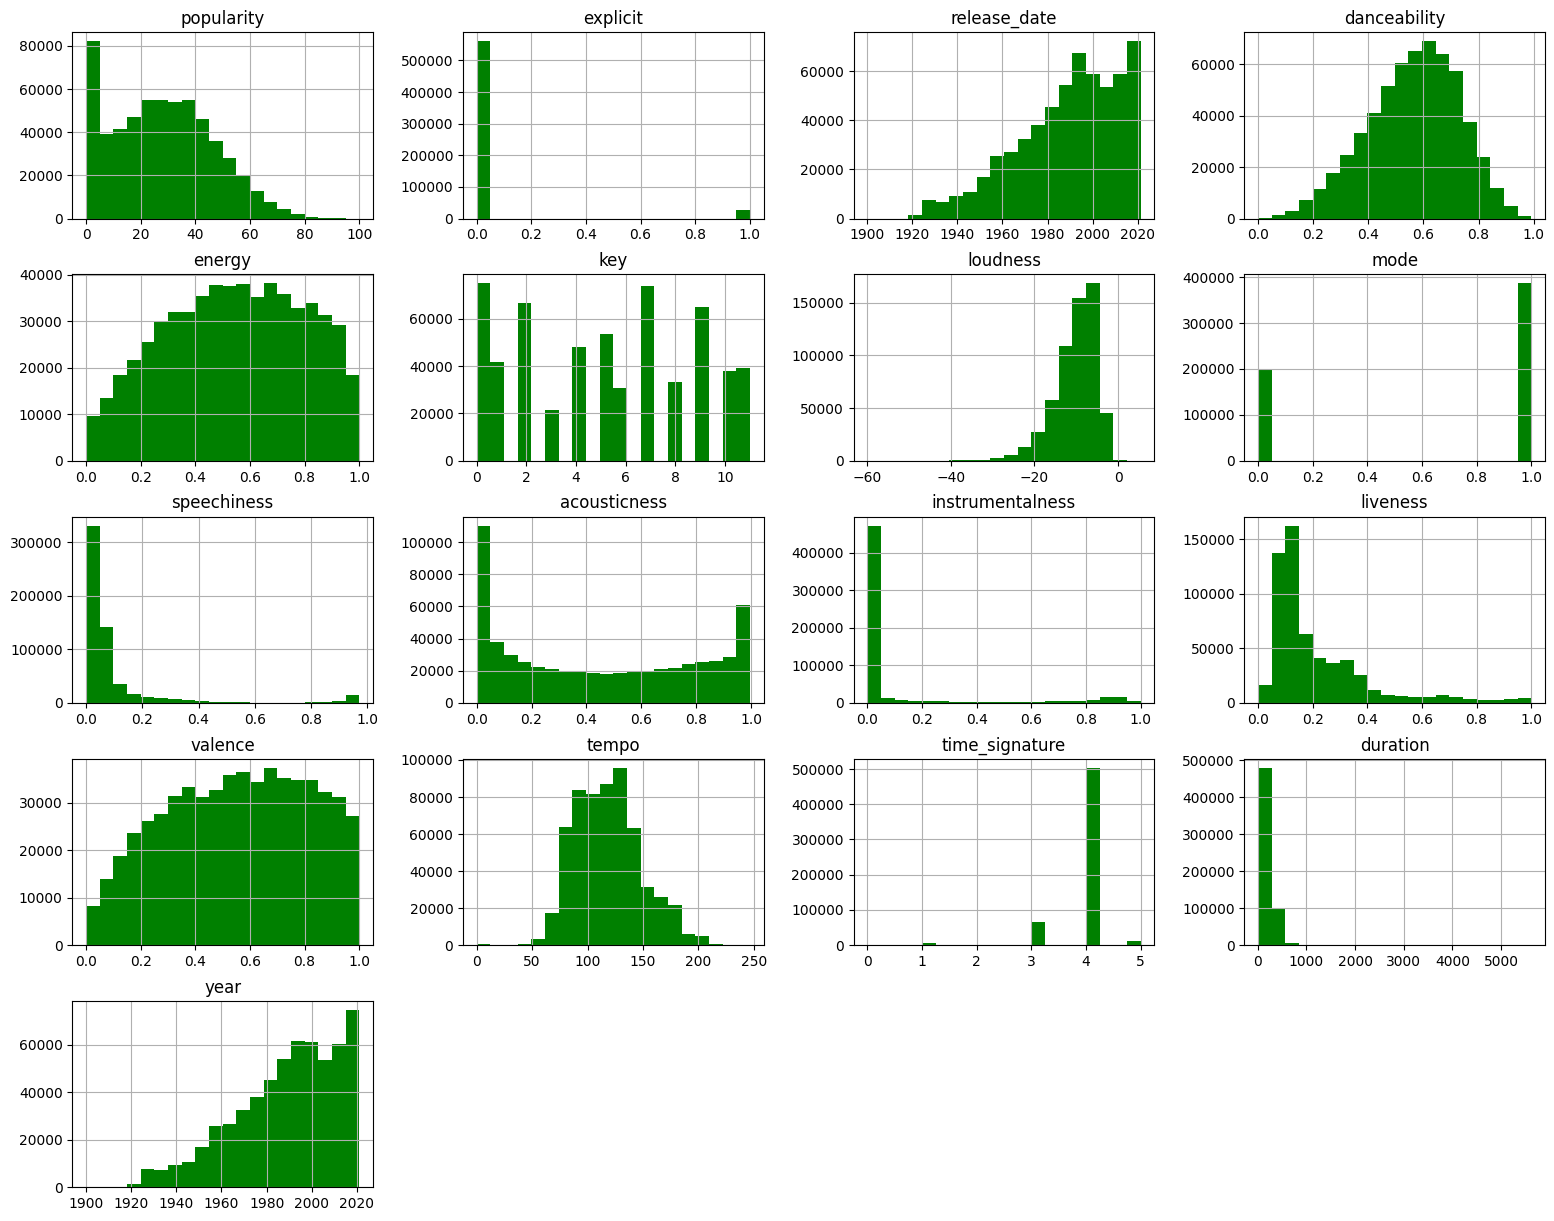

In [147]:
df.hist(bins = 20, color = 'green', figsize = (19, 15))

#######################


----- DATA ANALYSIS -----


#######################

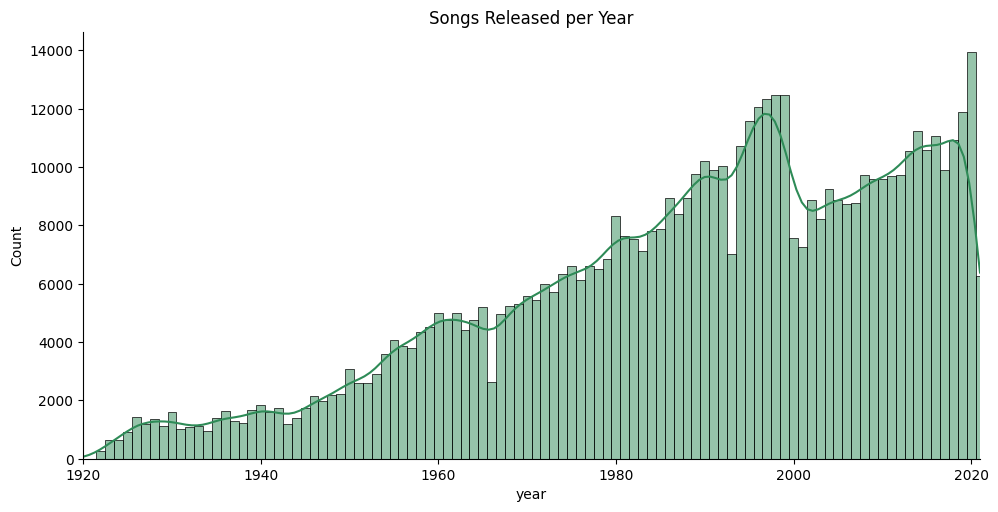

In [148]:
sns.displot(df['year'], discrete = True, aspect = 2, height = 5, kind = 'hist', 
            color = 'seagreen', kde=True).set(xlim=(1920,2021),title='Songs Released per Year')

[Text(0.5, 0, 'popularity'),
 Text(1.5, 0, 'danceability'),
 Text(2.5, 0, 'energy'),
 Text(3.5, 0, 'loudness'),
 Text(4.5, 0, 'speechiness'),
 Text(5.5, 0, 'acousticness'),
 Text(6.5, 0, 'instrumentalness'),
 Text(7.5, 0, 'liveness'),
 Text(8.5, 0, 'valence'),
 Text(9.5, 0, 'tempo'),
 Text(10.5, 0, 'time_signature'),
 Text(11.5, 0, 'duration')]

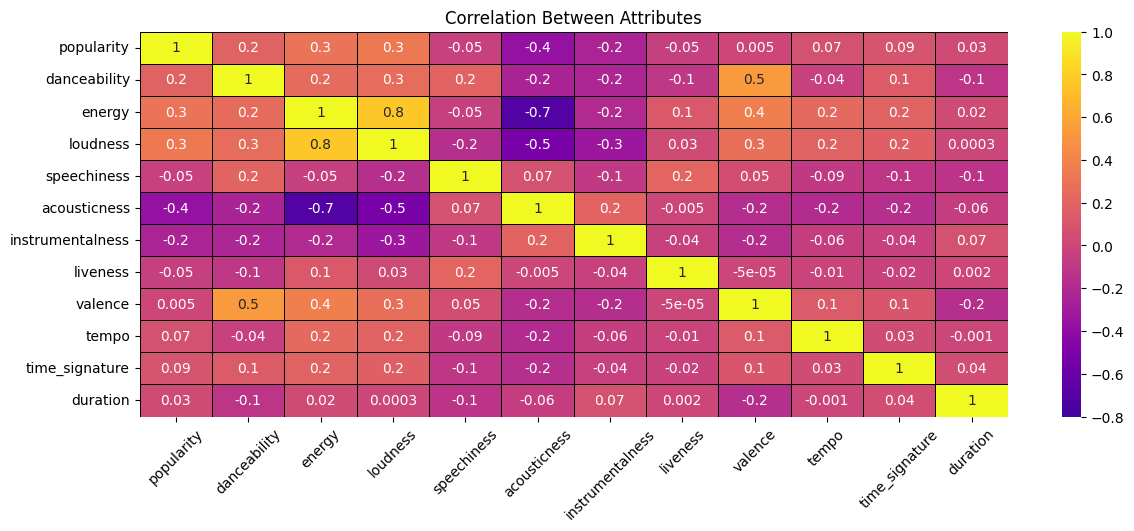

In [149]:
hm = df.drop(['key','mode','explicit','release_date','year'], axis=1).corr(method='pearson')
plt.figure(figsize=(14,5))
map = sns.heatmap(hm, annot = True, fmt = '.1g', linewidths = .5, linecolor = 'Black',cmap='plasma', center=0, vmin= -.8, vmax=1)
map.set_title("Correlation Between Attributes")
map.set_xticklabels(map.get_xticklabels(), rotation=45)

[Text(0.5, 1.0, 'Loudness vs. Energy')]

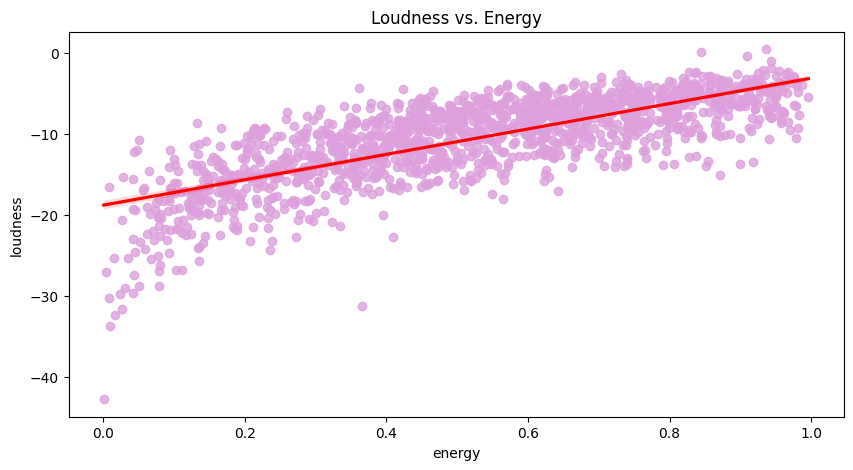

In [150]:
sample = df.sample(int(.0025* len(df)))
plt.figure(figsize=(10,5))
sns.regplot(data=sample, y='loudness', x='energy', color='plum', line_kws={"color":"red"}).set(title='Loudness vs. Energy')

[Text(0.5, 1.0, 'Energy vs Popularity')]

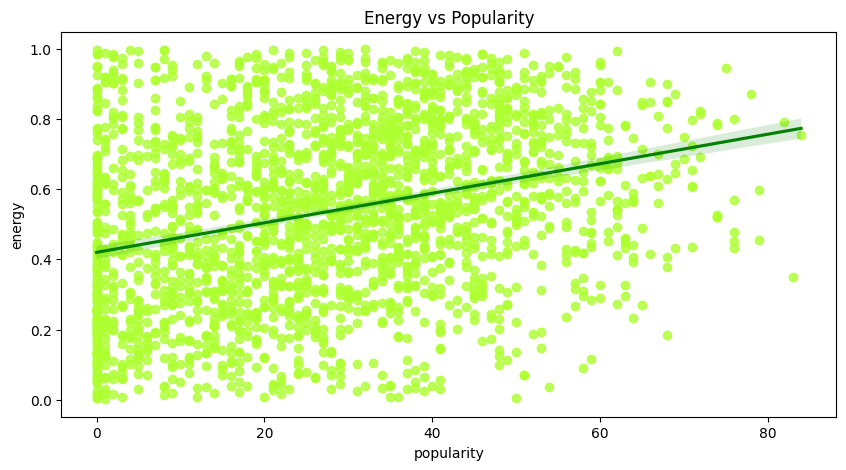

In [151]:
sample = df.sample(int(.004* len(df)))
plt.figure(figsize=(10,5))
sns.regplot(data=sample, y='energy', x='popularity', color='greenyellow', line_kws={"color":"green"}).set(title='Energy vs Popularity')

[Text(0.5, 1.0, 'Valence vs Danceability')]

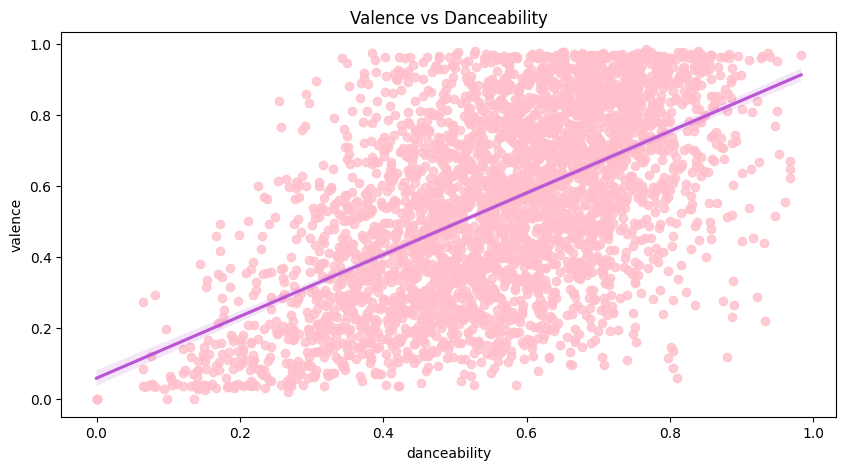

In [152]:
sample = df.sample(int(.006* len(df)))
plt.figure(figsize=(10,5))
sns.regplot(data=sample, y='valence', x='danceability', color='pink', line_kws={"color":"mediumorchid"}).set(title='Valence vs Danceability')

[Text(0.5, 1.0, 'Energy vs Acousticness')]

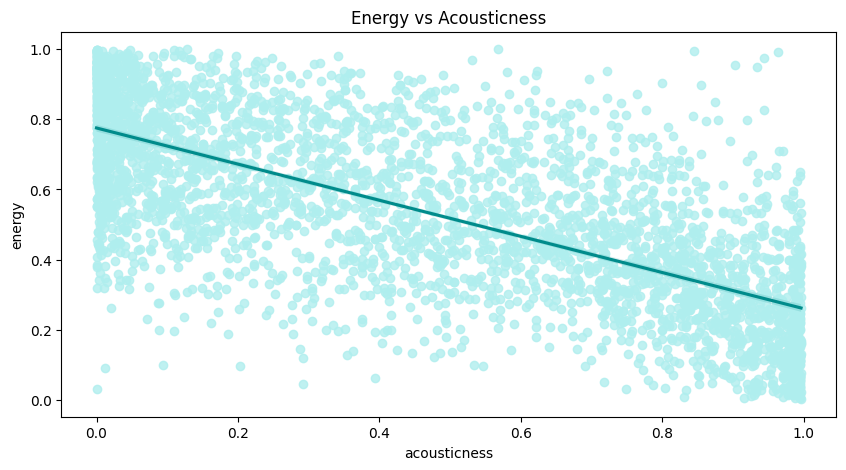

In [153]:
sample = df.sample(int(.006* len(df)))
plt.figure(figsize=(10,5))
sns.regplot(data=sample, y='energy', x='acousticness', color='paleturquoise', line_kws={"color":"darkcyan"}).set(title='Energy vs Acousticness')

In [154]:
ts = df.loc[df.artists.str.contains('Taylor Swift')]
ts.head()

,id,name,popularity,explicit,artists,id_artists,release_date,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration,year
79931,43H3q2NWT9LCuYS1B5IUvV,Our Song,62,0,['Taylor Swift'],['06HL4z0CvFAxyc27GXpf02'],2006-10-24,0.667,0.659,2,...,1,0.0298,0.113,0.000000,0.3250,0.575,89.128,4,203,2006
80133,2TF4UtYreqNbQ6Z9AccldU,Teardrops On My Guitar - Radio Single Remix,59,0,['Taylor Swift'],['06HL4z0CvFAxyc27GXpf02'],2006-10-24,0.621,0.417,10,...,1,0.0231,0.288,0.000000,0.1190,0.289,99.953,4,203,2006
80310,7snx7w5WZLHovS0xC45ZfP,Teardrops On My Guitar - Radio Single Remix,58,0,['Taylor Swift'],['06HL4z0CvFAxyc27GXpf02'],2006-10-24,0.626,0.440,10,...,1,0.0232,0.331,0.000000,0.1460,0.259,99.962,4,205,2006
81277,1D4PL9B8gOg78jiHg3FvBb,Love Story,78,0,['Taylor Swift'],['06HL4z0CvFAxyc27GXpf02'],2008-11-11,0.617,0.741,2,...,1,0.0311,0.131,0.000000,0.0772,0.306,118.984,4,236,2008
81319,1GEBsLDvJGw7kviySRI6GX,You Belong With Me,74,0,['Taylor Swift'],['06HL4z0CvFAxyc27GXpf02'],2008-11-11,0.687,0.745,6,...,1,0.0379,0.178,0.000016,0.1110,0.435,129.966,4,232,2008


In [155]:
ts1 = ts.drop(columns=['id','name','artists','id_artists','release_date','mode','key','time_signature','loudness'])
df1 = df.drop(columns=['id','name','artists','id_artists','release_date','mode','key','time_signature','loudness'])

In [156]:
ts_avg = ts1.mean()
ts_avg

popularity            61.220513
explicit               0.030769
danceability           0.587603
energy                 0.628097
speechiness            0.047795
acousticness           0.222807
instrumentalness       0.001253
liveness               0.148121
valence                0.431943
tempo                123.608974
duration             242.053846
year                2012.517949
dtype: float64

In [157]:
df_max = df1.max()
df_max

popularity           100.000
explicit               1.000
danceability           0.991
energy                 1.000
speechiness            0.971
acousticness           0.996
instrumentalness       1.000
liveness               1.000
valence                1.000
tempo                246.381
duration            5621.000
year                2021.000
dtype: float64

In [158]:
ts_stats = ts_avg.divide(df_max)
ts_stats.reset_index()
ts_radius = ts_stats.tolist()
ts_stats = ts_stats.to_frame()
del ts_radius[-2:]
ts_stats

,0
popularity,0.612205
explicit,0.030769
danceability,0.592939
energy,0.628097
speechiness,0.049223
acousticness,0.223701
instrumentalness,0.001253
liveness,0.148121
valence,0.431943
tempo,0.501698


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



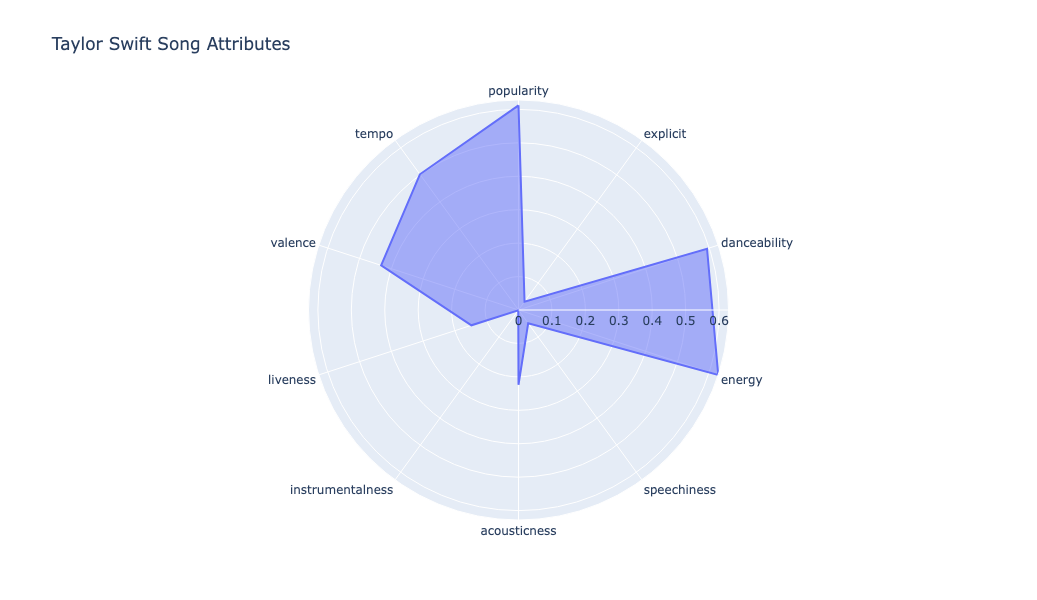

In [159]:
import plotly.express as px

ts_graph = pd.DataFrame(dict(
    r = ts_radius,
    theta = ['popularity', 'explicit', 'danceability', 'energy', 'speechiness', 
         'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']))
fig = px.line_polar(ts_graph, r='r', theta='theta', line_close=True, title='Taylor Swift Song Attributes',
                   width=600,height=600)
fig.update_traces(fill='toself')
fig.show()

In [160]:
es = df.loc[df.artists.str.contains('Ed Sheeran')]
es1 = es.drop(columns=['id','name','artists','id_artists','release_date','mode','key','time_signature','loudness'])
es_avg = es1.mean()
es_stats = es_avg.divide(df_max)
es_stats.reset_index()
es_radius = es_stats.tolist()
es_stats = es_stats.to_frame()
del es_radius[-2:]

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



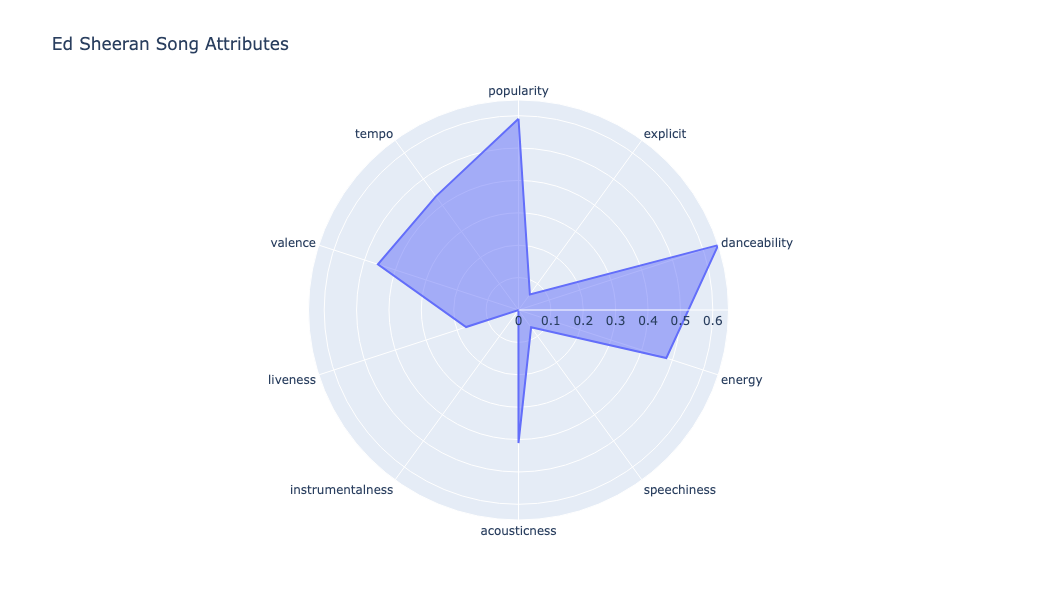

In [161]:
es_graph = pd.DataFrame(dict(
    r = es_radius,
    theta = ['popularity', 'explicit', 'danceability', 'energy', 'speechiness', 
         'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']))
fig = px.line_polar(es_graph, r='r', theta='theta', line_close=True, title='Ed Sheeran Song Attributes',
                   width=600,height=600)
fig.update_traces(fill='toself')
fig.show()

In [162]:
jb = df.loc[df.artists.str.contains('Justin Bieber')]
jb1 = jb.drop(columns=['id','name','artists','id_artists','release_date','mode','key','time_signature','loudness'])
jb_avg = jb1.mean()
jb_stats = jb_avg.divide(df_max)
jb_stats.reset_index()
jb_radius = jb_stats.tolist()
jb_stats = jb_stats.to_frame()
del jb_radius[-2:]

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



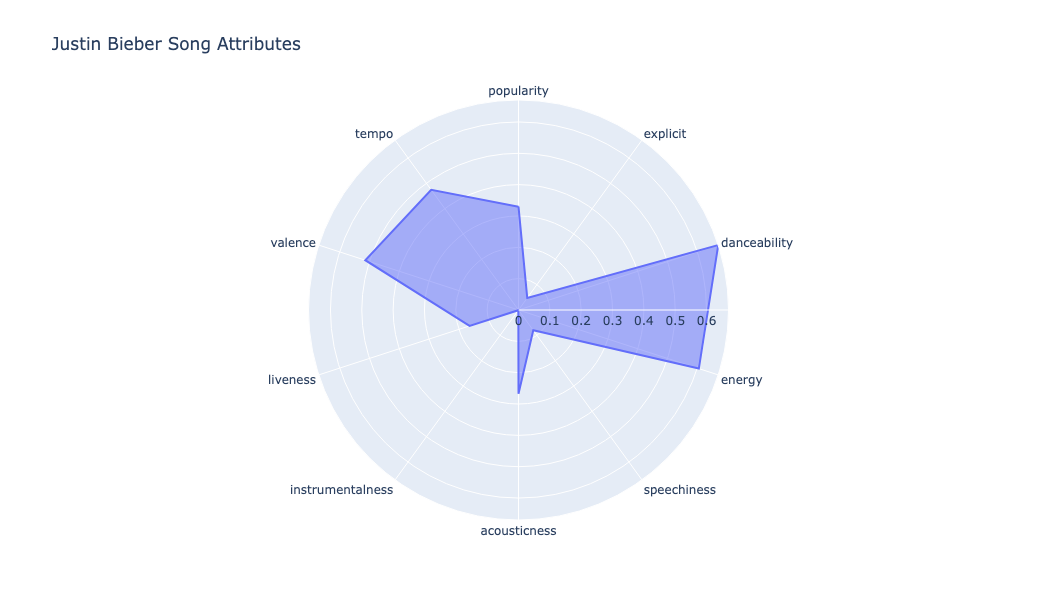

In [163]:
jb_graph = pd.DataFrame(dict(
    r = jb_radius,
    theta = ['popularity', 'explicit', 'danceability', 'energy', 'speechiness', 
         'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']))
fig = px.line_polar(jb_graph, r='r', theta='theta', line_close=True, title='Justin Bieber Song Attributes',
                   width=600,height=600)
fig.update_traces(fill='toself')
fig.show()

In [164]:
rh = df.loc[df.artists.str.contains('Radiohead')]
rh1 = rh.drop(columns=['id','name','artists','id_artists','release_date','mode','key','time_signature','loudness'])
rh_avg = rh1.mean()
rh_stats = rh_avg.divide(df_max)
rh_stats.reset_index()
rh_radius = rh_stats.tolist()
rh_stats = rh_stats.to_frame()
del rh_radius[-2:]

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



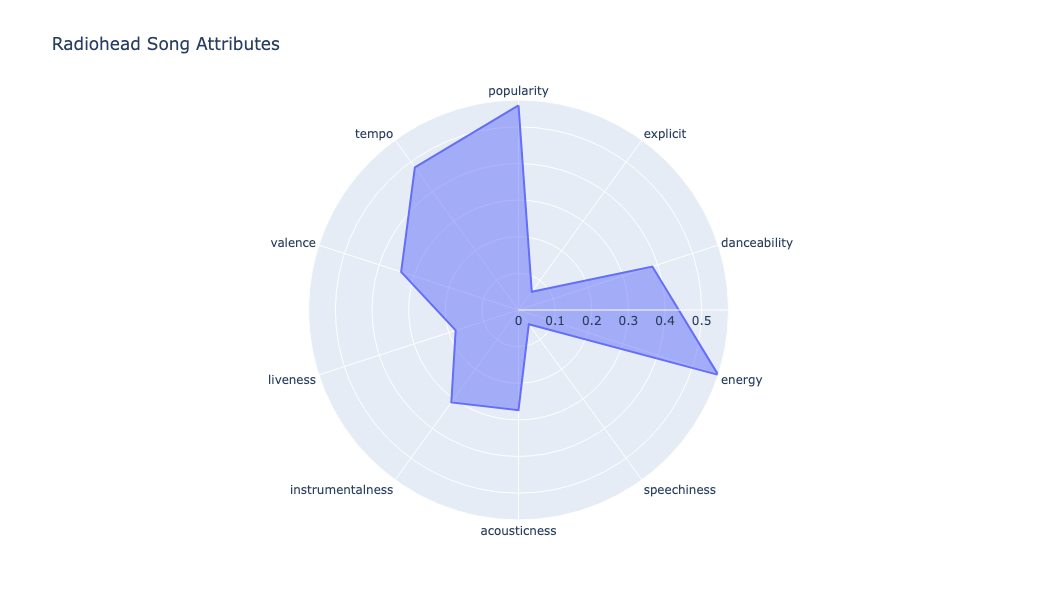

In [165]:
rh_graph = pd.DataFrame(dict(
    r = rh_radius,
    theta = ['popularity', 'explicit', 'danceability', 'energy', 'speechiness', 
         'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']))
fig = px.line_polar(rh_graph, r='r', theta='theta', line_close=True, title='Radiohead Song Attributes',
                   width=600,height=600)
fig.update_traces(fill='toself')
fig.show()

In [166]:
fl = df.loc[df.artists.str.contains('blink-182')]
fl1 = fl.drop(columns=['id','name','artists','id_artists','release_date','mode','key','time_signature','loudness'])
fl_avg = fl1.mean()
fl_stats = fl_avg.divide(df_max)
fl_stats.reset_index()
fl_radius = fl_stats.tolist()
fl_stats = fl_stats.to_frame()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



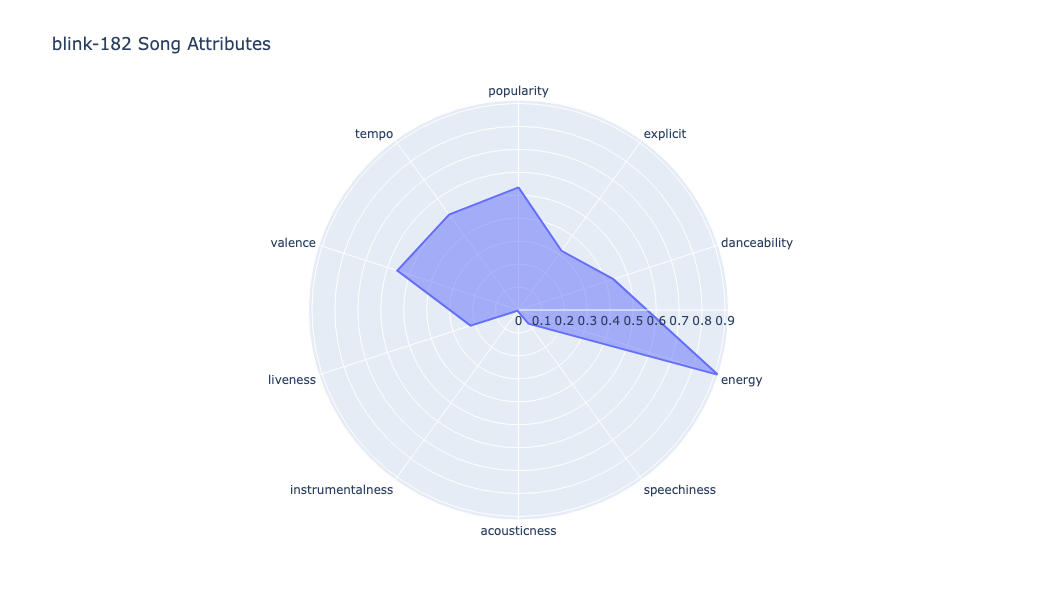

In [167]:
del fl_radius[-2:]
fl_graph = pd.DataFrame(dict(
    r = fl_radius,
    theta = ['popularity', 'explicit', 'danceability', 'energy', 'speechiness', 
         'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']))
fig = px.line_polar(fl_graph, r='r', theta='theta', line_close=True, title='blink-182 Song Attributes',
                   width=600,height=600)
fig.update_traces(fill='toself')
fig.show()